## The next cell will get a ~65 MB data file 'sequence.index', you only need to run the cell once

In [1]:
!rm sequence.index 2>/dev/null
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/historical_data/former_toplevel/sequence.index -O sequence.index

--2019-09-26 09:59:06--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/historical_data/former_toplevel/sequence.index
           => ‘sequence.index’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.192.8
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.192.8|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/historical_data/former_toplevel ... done.
==> SIZE sequence.index ... 67069489
==> PASV ... done.    ==> RETR sequence.index ... done.
Length: 67069489 (64M) (unauthoritative)

sequence.index      100%[===================>]  63.96M  2.07MB/s    in 29s     

2019-09-26 09:59:37 (2.24 MB/s) - ‘sequence.index’ saved [67069489]



# Interfacing with R

In [4]:
# !conda install rpy2
!pip install rpy2


  Using cached https://files.pythonhosted.org/packages/85/a3/4948c12c3701b47410ea1bb27508737983d61255fb291a51cebca6460fc8/rpy2-3.1.0.tar.gz
  Created wheel for rpy2: filename=rpy2-3.1.0-cp36-none-any.whl size=169054 sha256=3ae8acfd1182ff4d6bf891553c1d0b965caa3d651559fcbc6151cc4097dc9a3f
  Stored in directory: /Users/krex/Library/Caches/pip/wheels/14/4c/02/338ac154b7e42dd6564be1be51833e3ae029284850f9df4287
Successfully built rpy2


In [6]:
import os

from IPython.display import Image

In [16]:
import rpy2.robjects

ValueError: r_home is None. Try python -m rpy2.situation

In [15]:
import rpy2.robjects as robjects

ValueError: r_home is None. Try python -m rpy2.situation

In [9]:
## import rpy2.robjects as robjects
## this doesnt work so rpy2.situation works!
import rpy2.situation as robjects

In [ ]:
#import rpy2.robjects.lib.ggplot2 as ggplot2

In [10]:
from rpy2.robjects.functions import SignatureTranslatedFunction

ValueError: r_home is None. Try python -m rpy2.situation

In [5]:
import pandas as pd
import pandas.rpy.common as pd_common

ValueError: r_home is None. Try python -m rpy2.situation

In [2]:
read_delim = robjects.r('read.delim')
seq_data = read_delim('sequence.index', header=True, stringsAsFactors=False)
#In R:
#  seq.data <- read.delim('sequence.index', header=TRUE, stringsAsFactors=FALSE)

In [3]:
print('This data frame has %d columns and %d rows' % (seq_data.ncol, seq_data.nrow))
print(seq_data.colnames)
#In R:
#  print(colnames(seq.data))
#  print(nrow(seq.data))
#  print(ncol(seq.data))

print('Columns in Python %d ' % robjects.r.ncol(seq_data)[0])

#access some functions
as_integer = robjects.r('as.integer')
match = robjects.r.match

my_col = match('READ_COUNT', seq_data.colnames)[0] # Vector returned
print('Type of read count before as.integer: %s' % seq_data[my_col - 1].rclass[0])
seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])
print('Type of read count after as.integer: %s' % seq_data[my_col - 1].rclass[0])

my_col = match('BASE_COUNT', seq_data.colnames)[0] # Vector returned
seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])

my_col = match('CENTER_NAME', seq_data.colnames)[0]
seq_data[my_col - 1] = robjects.r.toupper(seq_data[my_col - 1])
robjects.r.assign('seq.data', seq_data)
robjects.r('print(c("Column names in R: ",colnames(seq.data)))')

robjects.r('seq.data <- seq.data[seq.data$WITHDRAWN==0, ]')
#Lets remove all withdrawn sequences

robjects.r("seq.data <- seq.data[, c('STUDY_ID', 'STUDY_NAME', 'CENTER_NAME', 'SAMPLE_ID', 'SAMPLE_NAME', 'POPULATION', 'INSTRUMENT_PLATFORM', 'LIBRARY_LAYOUT', 'PAIRED_FASTQ', 'READ_COUNT', 'BASE_COUNT', 'ANALYSIS_GROUP')]")
#Lets shorten the dataframe

#Population as factor
robjects.r('seq.data$POPULATION <- as.factor(seq.data$POPULATION)')

This data frame has 26 columns and 187720 rows
 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     

Columns in Python 26 
Type of read count before as.integer: character
Type of read count after as.integer: integer
 [1]
 "Column names in R: "
 "FASTQ_FILE"         
 "MD5"                


 [4]
 "RUN_ID"             
 "STUDY_ID"           
 "STUDY_NAME"         


 [7]
 "CENTER_NAME"        
 "SUBMISSION_ID"      
 "SUBMISSION_DATE

<FactorVector - Python:0x7fa7bd3d4208 / R:0xf478c60>
[      27,       27,       27, ...,       25,       25,       25]

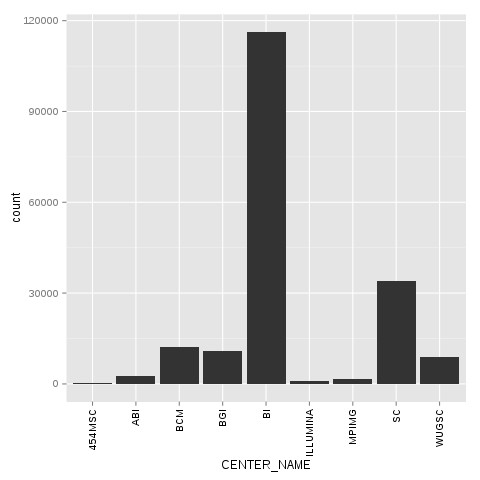

In [4]:
ggplot2.theme = SignatureTranslatedFunction(ggplot2.theme,
                                            init_prm_translate = {'axis_text_x': 'axis.text.x'})
bar = ggplot2.ggplot(seq_data) + ggplot2.geom_bar() + ggplot2.aes_string(x='CENTER_NAME') + ggplot2.theme(axis_text_x=ggplot2.element_text(angle=90, hjust=1))
robjects.r.png('out.png')
bar.plot()
dev_off = robjects.r('dev.off')
dev_off()
Image(filename='out.png')

In [5]:
#Get Yoruba and CEU
robjects.r('yri_ceu <- seq.data[seq.data$POPULATION %in% c("YRI", "CEU") & seq.data$BASE_COUNT < 2E9 & seq.data$READ_COUNT < 3E7, ]')
yri_ceu = robjects.r('yri_ceu')

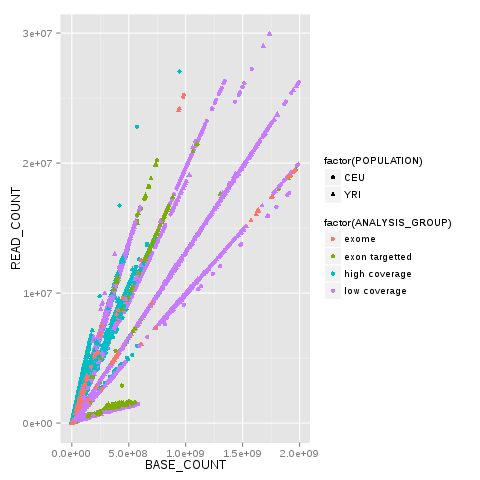

In [6]:
scatter = ggplot2.ggplot(yri_ceu) + ggplot2.aes_string(x='BASE_COUNT', y='READ_COUNT', shape='factor(POPULATION)', col='factor(ANALYSIS_GROUP)') + ggplot2.geom_point()
robjects.r.png('out.png')
scatter.plot()
dev_off = robjects.r('dev.off')
dev_off()
Image(filename='out.png')

In [7]:
pd_yri_ceu = pd_common.load_data('yri_ceu')
print(type(pd_yri_ceu))
pd_yri_ceu

<class 'pandas.core.frame.DataFrame'>


STUDY_ID                                         STUDY_NAME  \
1       SRP000032                        1000Genomes Project Pilot 2   
2       SRP000032                        1000Genomes Project Pilot 2   
3       SRP000032                        1000Genomes Project Pilot 2   
4       SRP000032                        1000Genomes Project Pilot 2   
5       SRP000032                        1000Genomes Project Pilot 2   
6       SRP000032                        1000Genomes Project Pilot 2   
7       SRP000032                        1000Genomes Project Pilot 2   
8       SRP000032                        1000Genomes Project Pilot 2   
9       SRP000032                        1000Genomes Project Pilot 2   
10      SRP000032                        1000Genomes Project Pilot 2   
11      SRP000032                        1000Genomes Project Pilot 2   
12      SRP000032                        1000Genomes Project Pilot 2   
13      SRP000032                        1000Genomes Project Pilot 2   
14      SRP000032                        1000Genomes Project Pilot 2   
15      SRP000032                        1000Genomes Project Pilot 2   
16      SRP000032                        1000Genomes Project Pilot 2   
17      SRP000032                        1000Genomes Project Pilot 2   
18      SRP000032                        1000Genomes Project Pilot 2   
19      SRP000032                        1000Genomes Project Pilot 2   
20      SRP000032                        1000Genomes Project Pilot 2   
21      SRP000032                        1000Genomes Project Pilot 2   
22      SRP000032                        1000Genomes Project Pilot 2   
23      SRP000032                        1000Genomes Project Pilot 2   
24      SRP000032                        1000Genomes Project Pilot 2   
25      SRP000032                        1000Genomes Project Pilot 2   
26      SRP000032                        1000Genomes Project Pilot 2   
27      SRP000032                        1000Genomes Project Pilot 2   
28      SRP000032                        1000Genomes Project Pilot 2   
29      SRP000032                        1000Genomes Project Pilot 2   
30      SRP000032                        1000Genomes Project Pilot 2   
...           ...                                                ...   
178036  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178039  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178054  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178063  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178081  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178084  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178096  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178099  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178117  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178135  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178144  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178171  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178183  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178189  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178225  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178282  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178312  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178315  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178324  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178327  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178480  SRP000542      1000 Genomes YRI Yoruba population sequencing   
178750  SRP004078  1000 Genomes CEPH (Utah residents with ancestr...   
NA.298         NA                                                 NA   
NA.299         NA                                

In [8]:
del pd_yri_ceu['PAIRED_FASTQ']
no_paired = pd_common.convert_to_r_dataframe(pd_yri_ceu)
robjects.r.assign('no.paired', no_paired)
robjects.r("print(colnames(no.paired))")

 [1]
 "STUDY_ID"           
 "STUDY_NAME"         
 "CENTER_NAME"        


 [4]
 "SAMPLE_ID"          
 "SAMPLE_NAME"        
 "POPULATION"         


 [7]
 "INSTRUMENT_PLATFORM"
 "LIBRARY_LAYOUT"     
 "READ_COUNT"         


[10]
 "BASE_COUNT"         
 "ANALYSIS_GROUP"     




<StrVector - Python:0x7fa7b7c84ac8 / R:0x1061f248>
['STUD..., 'STUD..., 'CENT..., ..., 'READ..., 'BASE..., 'ANAL...]